In [1]:
# Dependancies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

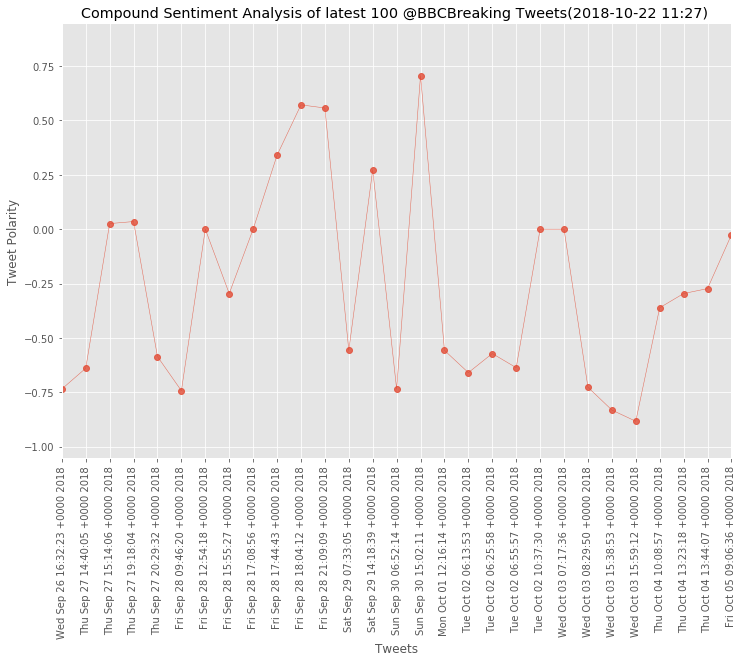

In [16]:
# State the target
target_user = "@BBCBreaking"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_bbc = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
              
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_bbc.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1
        
        # Convert sentiments to a DataFrame
sentiments_bbc_pd = pd.DataFrame.from_dict(sentiments_bbc)
#sentiments_bbc_pd.head()

sentiments_bbc_pd.to_csv("Output/bbc_tweet_sentiments.csv", index=True, header=True)

dates=datetime#.strftime("%Y-%m-%d %H:%M")
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)


# Create plot
x_vals = sentiments_bbc_pd["Date"]
y_vals = sentiments_bbc_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Compound Sentiment Analysis of latest 100 {target_user} Tweets({now}) ")
plt.xlim([x_vals.max(), x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")

plt.savefig("Images/BBC_Sentiment_Summary.png")
plt.show()

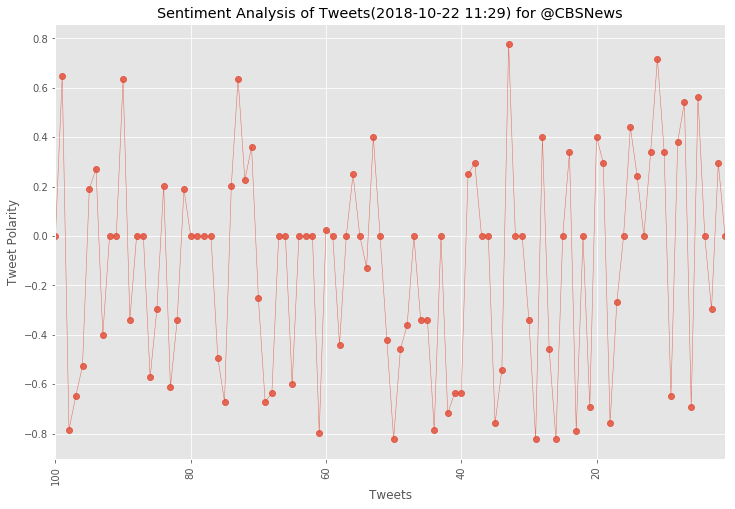

In [18]:
# State the target
target_user = "@CBSNews"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_cbs = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_cbs.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1
        
        # Convert sentiments to a DataFrame
sentiments_cbs_pd = pd.DataFrame.from_dict(sentiments_cbs)
#sentiments_cbs_pd.head()

sentiments_cbs_pd.to_csv("Output/cbs_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_cbs_pd["Tweets Ago"]
y_vals = sentiments_cbs_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Sentiment Analysis of Tweets({now}) for {target_user}")
plt.xlim([x_vals.max(), x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")
plt.savefig("Images/CBS_Sentiment_Summary.png")
plt.show()

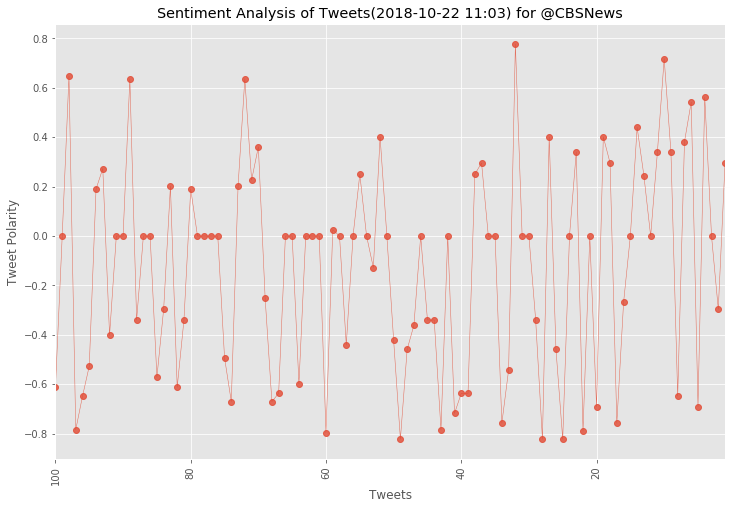

In [4]:
# State the target
target_user = "@CBSNews"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_cbs = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_cbs.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1
        
        # Convert sentiments to a DataFrame
sentiments_cbs_pd = pd.DataFrame.from_dict(sentiments_cbs)
#sentiments_bbc_pd.head()

sentiments_cbs_pd.to_csv("Output/cbs_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_cbs_pd["Tweets Ago"]
y_vals = sentiments_cbs_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Sentiment Analysis of Tweets({now}) for {target_user}")
plt.xlim([x_vals.max(), x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")
plt.savefig("Images/CBS_Sentiment_Summary.png")
plt.show()

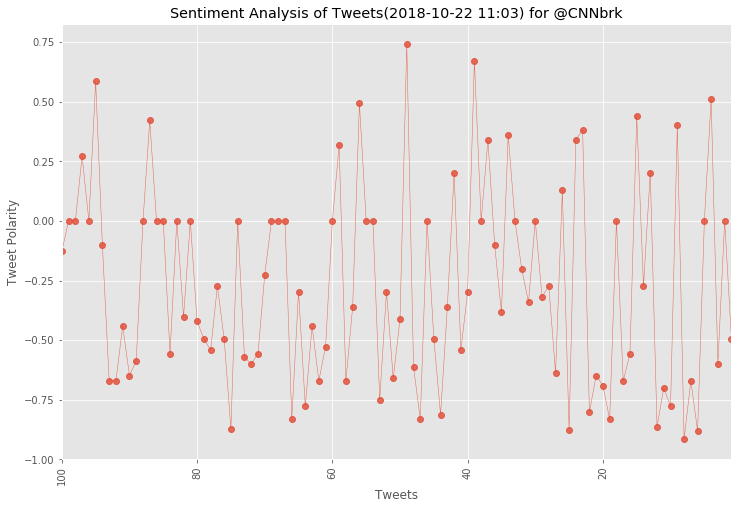

In [5]:

# State the target
target_user = "@CNNbrk"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_cnn = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_cnn.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1
        
        # Convert sentiments to a DataFrame
sentiments_cnn_pd = pd.DataFrame.from_dict(sentiments_cnn)
#sentiments_bbc_pd.head()

sentiments_cnn_pd.to_csv("Output/cnn_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_cnn_pd["Tweets Ago"]
y_vals = sentiments_cnn_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)


# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Sentiment Analysis of Tweets({now}) for {target_user}")
plt.xlim([x_vals.max(), x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.savefig("Images/CNN_Sentiment_Summary.png")
plt.xlabel("Tweets")
plt.show()

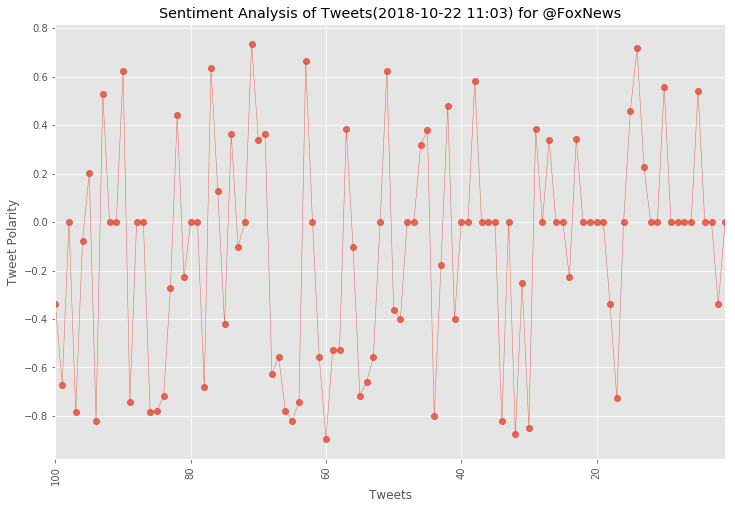

In [6]:

# State the target
target_user ="@FoxNews"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_fox = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_fox.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1
        
        # Convert sentiments to a DataFrame
sentiments_fox_pd = pd.DataFrame.from_dict(sentiments_fox)
#sentiments_bbc_pd.head()

sentiments_fox_pd.to_csv("Output/fox_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_fox_pd["Tweets Ago"]
y_vals = sentiments_fox_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Sentiment Analysis of Tweets({now}) for {target_user}")
plt.xlim([x_vals.max(), x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")
plt.savefig("Images/FOX_Sentiment_Summary.png")
plt.show()

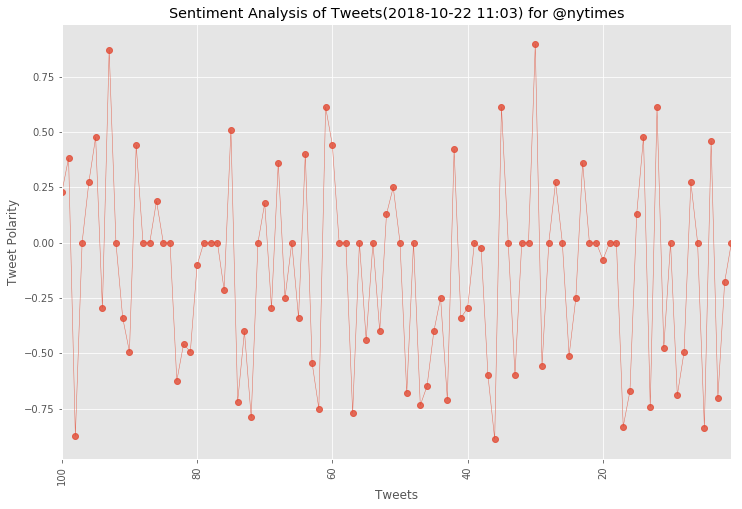

In [7]:

# State the target
target_user ="@nytimes"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_nyt = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_nyt.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1
        
        # Convert sentiments to a DataFrame
sentiments_nyt_pd = pd.DataFrame.from_dict(sentiments_nyt)
#sentiments_bbc_pd.head()

sentiments_nyt_pd.to_csv("Output/nyt_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_nyt_pd["Tweets Ago"]
y_vals = sentiments_nyt_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Sentiment Analysis of Tweets({now}) for {target_user}")
plt.xlim([x_vals.max(), x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")
plt.savefig("Images/NYTIMES_Sentiment_Summary.png")
plt.show()

In [ ]:
target_search = ["@BBCBreaking","@CBSNews","@CNNbrk","@FoxNews","@nytimes"]
#lang = "en"
for target_search in range(len(target_search)):
# Grab 100 tweets
    try:
        public_tweets = api.search(target_search, count=100, result_type="recent")
        
        compound_list = []
        positive_list = []
        negative_list = []
        neutral_list = []
        
    except tweepy.TweepError as e:
        print(f"exception for {row['Screen Name']}: {e}")
        public_tweets.drop(index=index,inplace=True)

In [ ]:
Omit_ROADWORK_Crash_Data_df = Crash_Data_df.loc[Crash_Data_df["EVENT"] != "ROADWORK", :]

group_by_direction_by_event = Omit_ROADWORK_Crash_Data_df.groupby(['DIRECTION','ROAD','LOCATION','EVENT'])

group_by_direction_by_event=group_by_direction_by_event.size().unstack()

group_by_direction_by_event.plot(kind='bar', title=(f'{d_min} to {d_max} EVENT BY LOCATION'), fontsize=15, figsize=[16,10], stacked=True, colormap='winter') # area plot
plt.savefig("Images/Crash_Hazards_Stalls_by_Location_Count.png")